1. lecture 9 slides have the complexities of all algorithms

2. lecture 7 explains norms and vector errors

3. 

## Iterations function (phi)

In [42]:
def iteration(x_initial, k_max, eps_x=0): # for the k_max, enter the number that uppears in the bracket of the desired term

    x = x_initial

    for k in range(k_max):
        x_previous = x              #This line keeps track of the previous iterate
        x = phi(x)                  # this line finds the k+1 iterate, meaning that at k=2 this line will compute
                                    # the iterate for iteration number k+1=2+1=3
        print(x,end=" ")
        
        if( abs(x-x_previous) < eps_x ):
            return x, k+1
        
    return x, k+1

def phi(x):
    return (3*x) - 1

iteration(1,3)


2 5 14 

(14, 3)

### Imports

In [43]:
import numpy as np
import numpy.linalg as npln
import scipy as sc
import scipy.linalg as scln
import matplotlib.pyplot as plt
import math


## Bisection Method Algorithm and Plot

iteration 1, err=2.0000e+00 and res=1.0000e+00
iteration 2, err=1.0000e+00 and res=4.5970e-01
iteration 3, err=5.0000e-01 and res=3.7758e-01
iteration 4, err=2.5000e-01 and res=1.8311e-02
iteration 5, err=1.2500e-01 and res=1.8596e-01
iteration 6, err=6.2500e-02 and res=8.5335e-02
iteration 7, err=3.1250e-02 and res=3.3879e-02
iteration 8, err=1.5625e-02 and res=7.8747e-03
iteration 9, err=7.8125e-03 and res=5.1957e-03
iteration 10, err=3.9062e-03 and res=1.3451e-03
iteration 11, err=1.9531e-03 and res=1.9239e-03
iteration 12, err=9.7656e-04 and res=2.8901e-04
iteration 13, err=4.8828e-04 and res=5.2816e-04
iteration 14, err=2.4414e-04 and res=1.1960e-04
iteration 15, err=1.2207e-04 and res=8.4701e-05
iteration 16, err=6.1035e-05 and res=1.7449e-05
iteration 17, err=3.0518e-05 and res=3.3625e-05
iteration 18, err=1.5259e-05 and res=8.0879e-06
iteration 19, err=7.6294e-06 and res=4.6807e-06

 x* = 0.7390823364257812


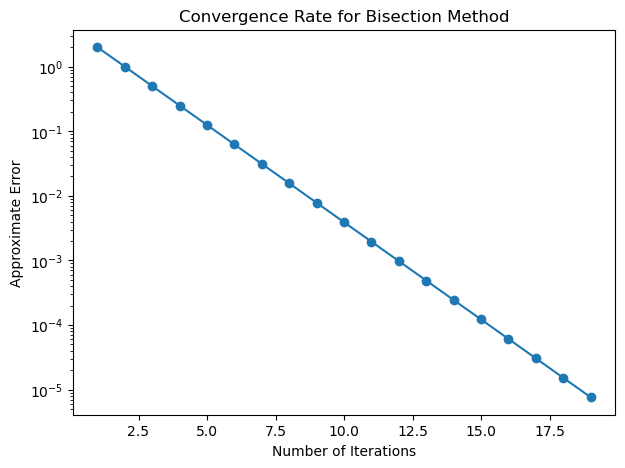

In [44]:
def bisect(f,a0,b0,k_max,eps_x,eps_f):
    conv = False                            # flag for convergence, default is "not converged"
    
    if ( f(a0)*f(b0) > 0):              # check to see whether we can guarantee convergence
        print('Error. f(a0) f(b0) > 0: Starting condition not satisfied.')
        return None, None, conv         # abort and print message if we can't guarantee convergence
    
    a = a0
    b = b0
    
    iteration_history = []              # a list to hold the information at each iteration
    
    
    for k in range(k_max):              # loop over at most k_max bisection steps
        c = (a + b)/2.0                 # find the current midpoint
        f_mid = f(c)                    # compute the function value at the midpoint
        f_left=f(a)                     # compute the function value at the current left boundary
        if (f_mid*f_left > 0):          # if they have the same sign...
            a=c                         # update the left boundary, otherwise...
        else:
            b=c                         # update the right boundary
        max_err = abs(b-a)              # compute the maximal error and the residual
        res = abs(f_mid)
        iteration_history.append([k+1, c, max_err, res])   # adding the current iteration information to the end of the list
  
        print(f'iteration {k+1}, err={max_err:.4e} and res={res:.4e}')  # Since k starts at 0, I added 1 to k to make the first iteration 1

        if (max_err < eps_x) and (res < eps_f):     # if both are less than their tolerance, stop iterations
            conv=True                                  # set the convergence flag to "converged"
            break

    if not conv:                       # print warning if the iterations did not converge
        print(f'No convergence after {k_max} interations')
        
    it_hist = np.array(iteration_history)  # plot will need this to be a numpy array not a list

    return c, it_hist, conv              # return the approximate solution, maximal error and convergence flag


def f(x):   
    return math.cos(x)-x                            # function definition of f(x), where we are solving f(x)=0
#    return np.exp(x)-x**3-3/2

a0 = -2.0                                # left end-point
b0 = 2.0                                # right end-point
k_max=100                               # maximum number of iterations
eps_x = 1.0e-5                          # tolerance on x
eps_f = 1.0                             # tolerance of function value

xstar,it_hist,conv=bisect(f,a0,b0,k_max,eps_x,eps_f)

if conv:
    print(f'\n x* = {xstar}')


################################-------------------------PLOT-----------------------##########################################
# number of iterations
xx = it_hist[:,0]
# max error per iteration
yy = it_hist[:,2]

# Create a figure with 1 subplots
fig, ax = plt.subplots(figsize=(7,5))

# Plotting the bisection rate convergence
ax.semilogy(xx, yy, '-o')


# Adding labels and a title
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Approximate Error')
ax.set_title('Convergence Rate for Bisection Method')

plt.show()

## Newton-Raphson Algorithm and Plot

iteration 1, x* = 0.68393972, approx error=3.1606e-01 and res=1.7183e+00
iteration 2, x* = 0.57745448, approx error=1.0649e-01 and res=3.5534e-01
iteration 3, x* = 0.56722974, approx error=1.0225e-02 and res=2.8734e-02
iteration 4, x* = 0.56714330, approx error=8.6441e-05 and res=2.3889e-04
iteration 5, x* = 0.56714329, approx error=6.1205e-09 and res=1.6912e-08
iteration 6, x* = 0.56714329, approx error=8.0357e-17 and res=2.2204e-16

 x* = 0.5671432904097838


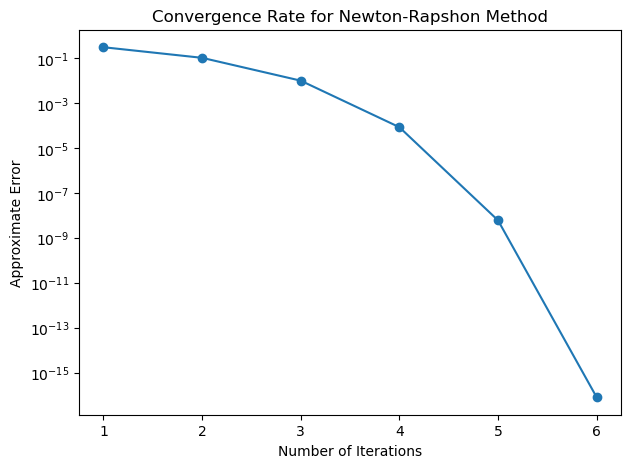

In [45]:
def NewtRaph(f,fprime,x0,k_max,eps_x,eps_f):
    
    conv = False                        # flag for convergence, default is "not converged"
    
    x = x0
    
    iteration_history = []              # to hold a list
    
    for k in range(k_max):              # loop over at most k_max Newton steps
        res = f(x)                      # compute the residual
        delta_x = - res/fprime(x)       # comput the Newton-Raphson update
        x = x + delta_x
           # compute the approximate error 
        err = abs(delta_x)
        iteration_history.append([k+1, x, err, res])
        
        print(f'iteration {k+1}, x* = {x:.8f}, approx error={err:.4e} and res={res:.4e}')  # Since k starts at 0, I added 1 to k to make the first iteration 1

        if (err < eps_x) and (abs(res) < eps_f):     # if both are less than their tolerance, stop iterations
            conv=True                                  # set the convergence flag to "converged"
            break

    if (conv==False):                       # print warning if the iterations did not converge
        print(f'No convergence after {k_max} interations')

    it_hist = np.array(iteration_history)  # plot will need this to be an array not a list

    return x,it_hist,conv                   # return the approximate solution, maximal error and convergence flag


def f(x):                               # function definition of f(x), where we are solving f(x)=0
    return  x*np.exp(x) - 1

def fprime(x):                          # function definition of f(x), where we are solving f(x)=0
    return np.exp(x)+x*np.exp(x) 


x0 = 1.0;
k_max=1000                              # maximum number of iterations
eps_x = 1.0e-14                        # tolerance on x
eps_f = 1.0                             # tolerance of function value

xstar,it_hist,conv=NewtRaph(f,fprime,x0,k_max,eps_x,eps_f)

if (conv==True):
    print(f'\n x* = {xstar}')

################################-------------------------PLOT-----------------------##########################################
# number of iterations
xx = it_hist[:,0]
# max error per iteration
yy = it_hist[:,2]

# Create a figure with 1 subplots
fig, ax = plt.subplots(figsize=(7,5))

# Plotting the Newton-Rapshon rate of convergence
ax.semilogy(xx, yy, '-o')


# Adding labels and a title
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Approximate Error')
ax.set_title('Convergence Rate for Newton-Rapshon Method')

plt.show()

## Secant Method Algorithm and Plot

Iteration 0: x1 = 5.0, x0 = 1, err=3.3333e+00, res=2.0000e+01
Iteration 1: x1 = 1.666666666666667, x0 = 5.0, err=3.3333e-01, res=2.2222e+00
Iteration 2: x1 = 2.0, x0 = 1.666666666666667, err=2.7273e-01, res=1.0000e+00
Iteration 3: x1 = 2.2727272727272725, x0 = 2.0, err=3.8685e-02, res=1.6529e-01
Iteration 4: x1 = 2.2340425531914896, x0 = 2.2727272727272725, err=2.0089e-03, res=9.0539e-03
Iteration 5: x1 = 2.236051502145923, x0 = 2.2340425531914896, err=1.6483e-05, res=7.3680e-05
Iteration 6: x1 = 2.2360679849648637, x0 = 2.236051502145923, err=7.4651e-09, res=3.3385e-08
Iteration 7: x1 = 2.2360679774997623, x0 = 2.2360679849648637, err=2.7407e-14, res=1.2257e-13
Converged!
x_star = 2.2360679774997623, error = 2.7407177343453444e-14, residual = 1.2256862191861728e-13, converged = True


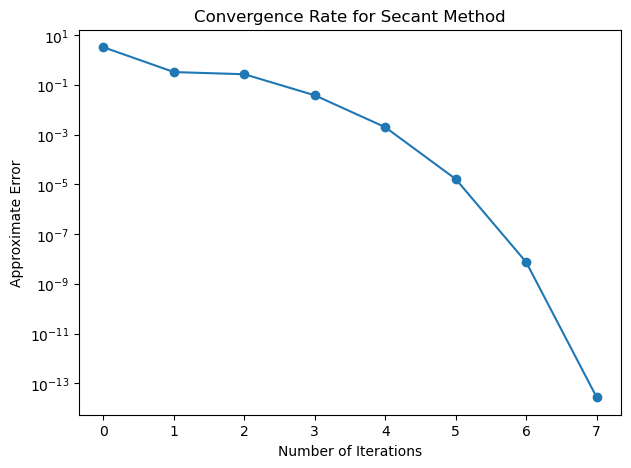

In [46]:
def SecantIteration(f, a0, a1, kMax, eps_x, eps_f):  
# Input: list the inputs in this comment

    x0 = a0
    x1 = a1                    # you'll need to change this: you now have 2 initial guesses 
    iterations = []    

    conv=False                 # flag for convergence
   
    for k in range(kMax):

        fx0=f(x0)
        fx1=f(x1)                # current function value
        
        # For the secant method, we no longer have an explicit definition for the derivative of our function f
        # for this reason our delta x (the amount by which we change x1 in order to get x2) can only be found using
        # an approximation of the slope of f(x) at x1 which is the slope of the secant line between x0 and x1
        dx = (-1) * ((fx1)*(x1 - x0)) * (fx1-fx0)**(-1)  # update step
        
        # the following error tolerances are for the x1 and x0 values of the previous iteration
        err = abs(dx)          # current error estimate
        res = abs(fx1)         # current residual
       
        # because the err and res values are for the previous iteration, we cannot write k+1 as the iteration number
        # for the err and res values of the current iteration. For example, the error values for the intial guesses
        # are calculated during the first iteration but are for values that existed before any iteration took place and so once
        # we arrive at convergence the total amount of iterations that will have taken place will be k and not k+1  
        print(f'Iteration {k}: x1 = {x1}, x0 = {x0}, err={err:.4e}, res={res:.4e}')        
        
        # appending a tuple containing the iteration number and the eps_x for the current iteration into the iterations list
        iterations.append([k, err])

        if err < eps_x and res < eps_f:       # If converged ...
            print("Converged!")
            conv=True
            break
        
        #  you'll need reassign values for the next iteration here
        x0=x1
        x1=x1+dx
    

    if (conv==False):
        print("No convergence!")
    
    return x1 ,err,res,conv,iterations

########################------------------------function---------------------#######################

def f(x):
    return (x**2 - a)

#############################------------------------assign parameter values------------------------#############################
a = 5.0

# for our two initial guesses we will use the fact that if a>1 then 1<sqrt(a)<a and if a<1 then 0<sqrt(a)<1
if (a > 1):
    x0 = 1
    x1 = a
else:
    x0 = 0
    x1 = 1

kmax = 50
eps_x = 1e-10
eps_f = 1e-10
#  call NewtonRaphson
x_starr, error, residual, converged, iterations = SecantIteration(f,x0,x1,kmax,eps_x,eps_f)
#  print out solution
print(f"x_star = {x_starr}, error = {error}, residual = {residual}, converged = {converged}")


###########################-----------------PLOT------------------###########################

sx = np.array(iterations)[:,0]
sy = np.array(iterations)[:,1]

# Create a figure with 1 subplots
fig, ax = plt.subplots(figsize=(7,5))

# Plotting the Newton-Rapshon rate of convergence
ax.semilogy(sx, sy, '-o')

# Adding labels and a title
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Approximate Error')
ax.set_title('Convergence Rate for Secant Method')

plt.show()

## Linear Algebra Commands

In [47]:
A = np.array([[-7,-5,3],[-1,-8,2]])   # matrices are defined as numpy arrays


print('The matrix A=')
print(A) 
print('\n')

a13 = A[0,2]        # for accessing the components of A
#or 
a13 = A[0][2]

print(f'The component a_1,3 of A = {a13}\n' )


# find the transpose of A
B = A.T
#  or
B = np.transpose(A)


print('The transpose of A is =')
print (B)
print('\n')


#  sum of matrices  (dimension must be the same)
C = np.add(A,2*A)
# or
C = A + 2*A

print('The sum of A and 2A is =')
print (C)
print('\n')

#  multipy two matrices  (dimensions must be such that the pperation is defined)
C = np.matmul(A,B)
# or
C = np.dot(A,B)  # this is not preferred 
#or
C = A @ B

print('Are dimensions for product right?')
print(np.shape(A)[1]==np.shape(B)[0])
print('\n')


print('The product of A and B =')
print (C)
print('\n')


A = np.array([[-7,-5,3],[-1,-8,2],[4,-1,0]])  

#  find the inverse of A (A needs to be square)
Ainv = scln.inv(A)   

#  find the determinant of A (A needs to be square)
d =  scln.det(A)

print('New A =')
print(A)
print('\nThe inverse of A = ' )
print(Ainv)
print('\nThe product of A and its inverse is the identity')
print(A@Ainv)
print('\n')


print(f'The det of A = {d}')
print('\n')

#  the identity matrix
Id=np.identity(4)

#  the zero matrix
Zmat=np.zeros((3,3))

print('the 4x4 identity matrix')
print(Id)
print(' and the 3x3 zero matrix')
print(Zmat)
print('\n')


#  the first unit vector (as a column vector)
e1 = Id[:,[0]]

print('The first unit fector is')
print(e1)
print('\n')

#  solve A x = b

A = np.array([[-7,-5],[-1,-8]])
b = np.array([[1],[3]])

xx = scln.solve(A,b)

print('Solving A x = b...')
print('x=')
print(xx)
print('\n')

The matrix A=
[[-7 -5  3]
 [-1 -8  2]]


The component a_1,3 of A = 3

The transpose of A is =
[[-7 -1]
 [-5 -8]
 [ 3  2]]


The sum of A and 2A is =
[[-21 -15   9]
 [ -3 -24   6]]


Are dimensions for product right?
True


The product of A and B =
[[83 53]
 [53 69]]


New A =
[[-7 -5  3]
 [-1 -8  2]
 [ 4 -1  0]]

The inverse of A = 
[[ 0.04444444 -0.06666667  0.31111111]
 [ 0.17777778 -0.26666667  0.24444444]
 [ 0.73333333 -0.6         1.13333333]]

The product of A and its inverse is the identity
[[ 1.00000000e+00  0.00000000e+00  2.22044605e-16]
 [-2.22044605e-16  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  5.55111512e-17  1.00000000e+00]]


The det of A = 45.0


the 4x4 identity matrix
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
 and the 3x3 zero matrix
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


The first unit fector is
[[1.]
 [0.]
 [0.]
 [0.]]


Solving A x = b...
x=
[[ 0.1372549 ]
 [-0.39215686]]




## Solving Matricies

In [52]:
########################-----------------------LU DECOMPOSITION (No Pivoting)--------------------#####################

def LU_NoPivot(A):
    N = np.shape(A)[0]                              # extract number of rows/columns (note: A should be square)
    U = np.copy(A)                                  # copy contents of A (avoid "U=A" to avoid changing A)
    L = np.identity(N)                              # initialize L as the identoty matrix
    
    for jj in range(N-1):                           # loop over columns (i.e. pivots), excluding the last
        for ii in range(jj+1,N):                    # loop over column elements (i.e. rows) below the pivot
            L[ii,jj] = U[ii,jj]/U[jj,jj]            # compute and store the multiplier in appropriate spot in L
            U[ii,:] = U[ii,:] - L[ii,jj] * U[jj,:]  # elementary row operation that zeros column element below pivot
            
    return L,U

##############--------------------LUP DECOMPOSITION-----------------#################
def LUPsolve(A,b):    # inputs n x n numpy array A, and n x 1 numpy array b

    Pt,L,U = scln.lu(A)
    P = Pt.T
    Pb = sc.matmul(P,b)
    y = scln.solve_triangular(L,Pb,lower=True)
    x = scln.solve_triangular(U,y,lower=False)
    
    return x, L, U, P     # outputs solution x, and numpy arrays L, U and P from PA = LU decomposition

##################--------------------Lower Triangular matrix vector multiplication (no one or zero multiplication)---------------#############

def LowTriangMatVec(A,x):
    
    n = A.shape[0]  #  get number of rows/columns
    c = np.zeros((n,1))   # initialize resultant vector
    
    for j in range(n):
        
        c[j] = x[j]
        
        for k in range(0,j):
            
            c[j]=c[j]+A[j,k]*x[k]
            
    return c    # c = Ax



# Define a matrix
A = np.array([[-1.0,  16.0,  0.0],
              [ 0.0,  4.0, 10.0 ],
              [ 1.0, -4.0, 40.0 ]])

b = np.array([17.0, 14.0, 35.0])

x_star = np.array([-0.99900385, 0.99991435, 1.0000192]) #npln.solve(A,b)

res = npln.norm(b - A@x_star, 2)
rel_res = npln.norm(b - A@x_star, 2)/npln.norm(b, 2)
max_rel_err = npln.cond(A) * rel_res

print("Residual = ", res)
print("Maximal Relative Error = ", max_rel_err)



Residual =  0.0031720080115044324
Maximal Relative Error =  0.05479673455486552
